In [74]:
import numpy as np
import scipy.stats
import pylab as plt
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

In [111]:
integral = []
errors = []
mu = 0
sigma = 3
i=0
for N in tqdm(range (100, 100000, 100)):
    
    distG = scipy.stats.halfnorm(mu, sigma)
    xi = distG.rvs(N) 

    def f(x):
        return x**3
    
    integral.append((((np.pi)/2)**0.5)*sigma*np.mean(f(xi)))
    errors.append(np.abs(integral[i]-(2*(sigma**4))))
    i = i+1

100%|██████████| 999/999 [00:04<00:00, 245.04it/s]


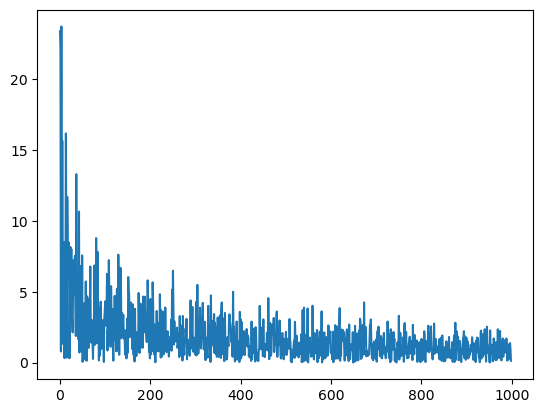

In [112]:
plt.plot(errors)

In [113]:
N=10000
rip = 10000
integral2 = []
errors2 = []

for i in tqdm(range(rip)):
    distG2 = scipy.stats.halfnorm(mu, sigma)
    xi2 = distG.rvs(N) 
    
    def f(x):
        return x**3
    
    integral2.append((((np.pi)/2)**0.5)*sigma*np.mean(f(xi2)))
    errors2.append(np.abs(integral2[i]-(2*(sigma**4))))

100%|██████████| 10000/10000 [00:14<00:00, 685.75it/s]


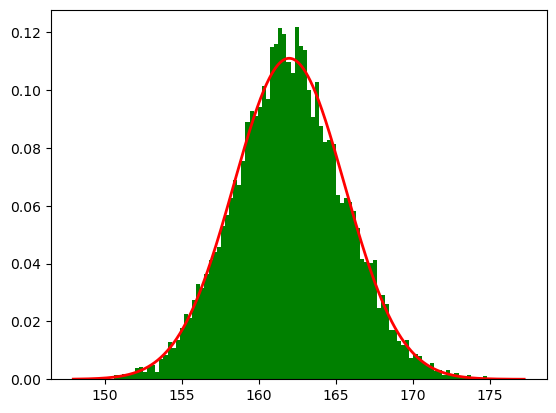

161.9645998194224 3.594847598845961


In [114]:
counts, bins, bars = plt.hist(integral2, bins = int(np.round(rip**0.5)), density=True, color ='green')
m, std = norm.fit(integral2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, m, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()
print(m, std)